Tahap 1: Seleksi dan Eksplorasi Kumpulan Data

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

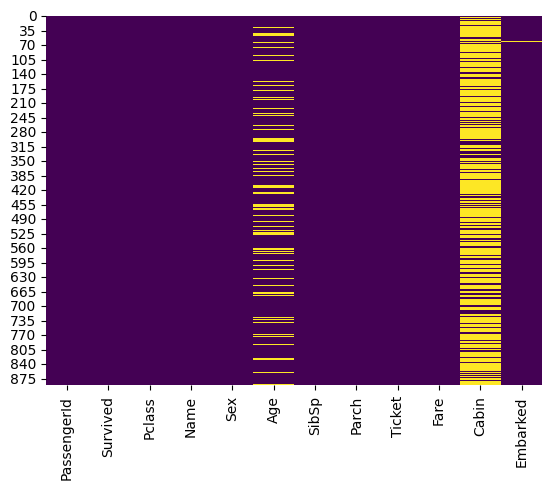

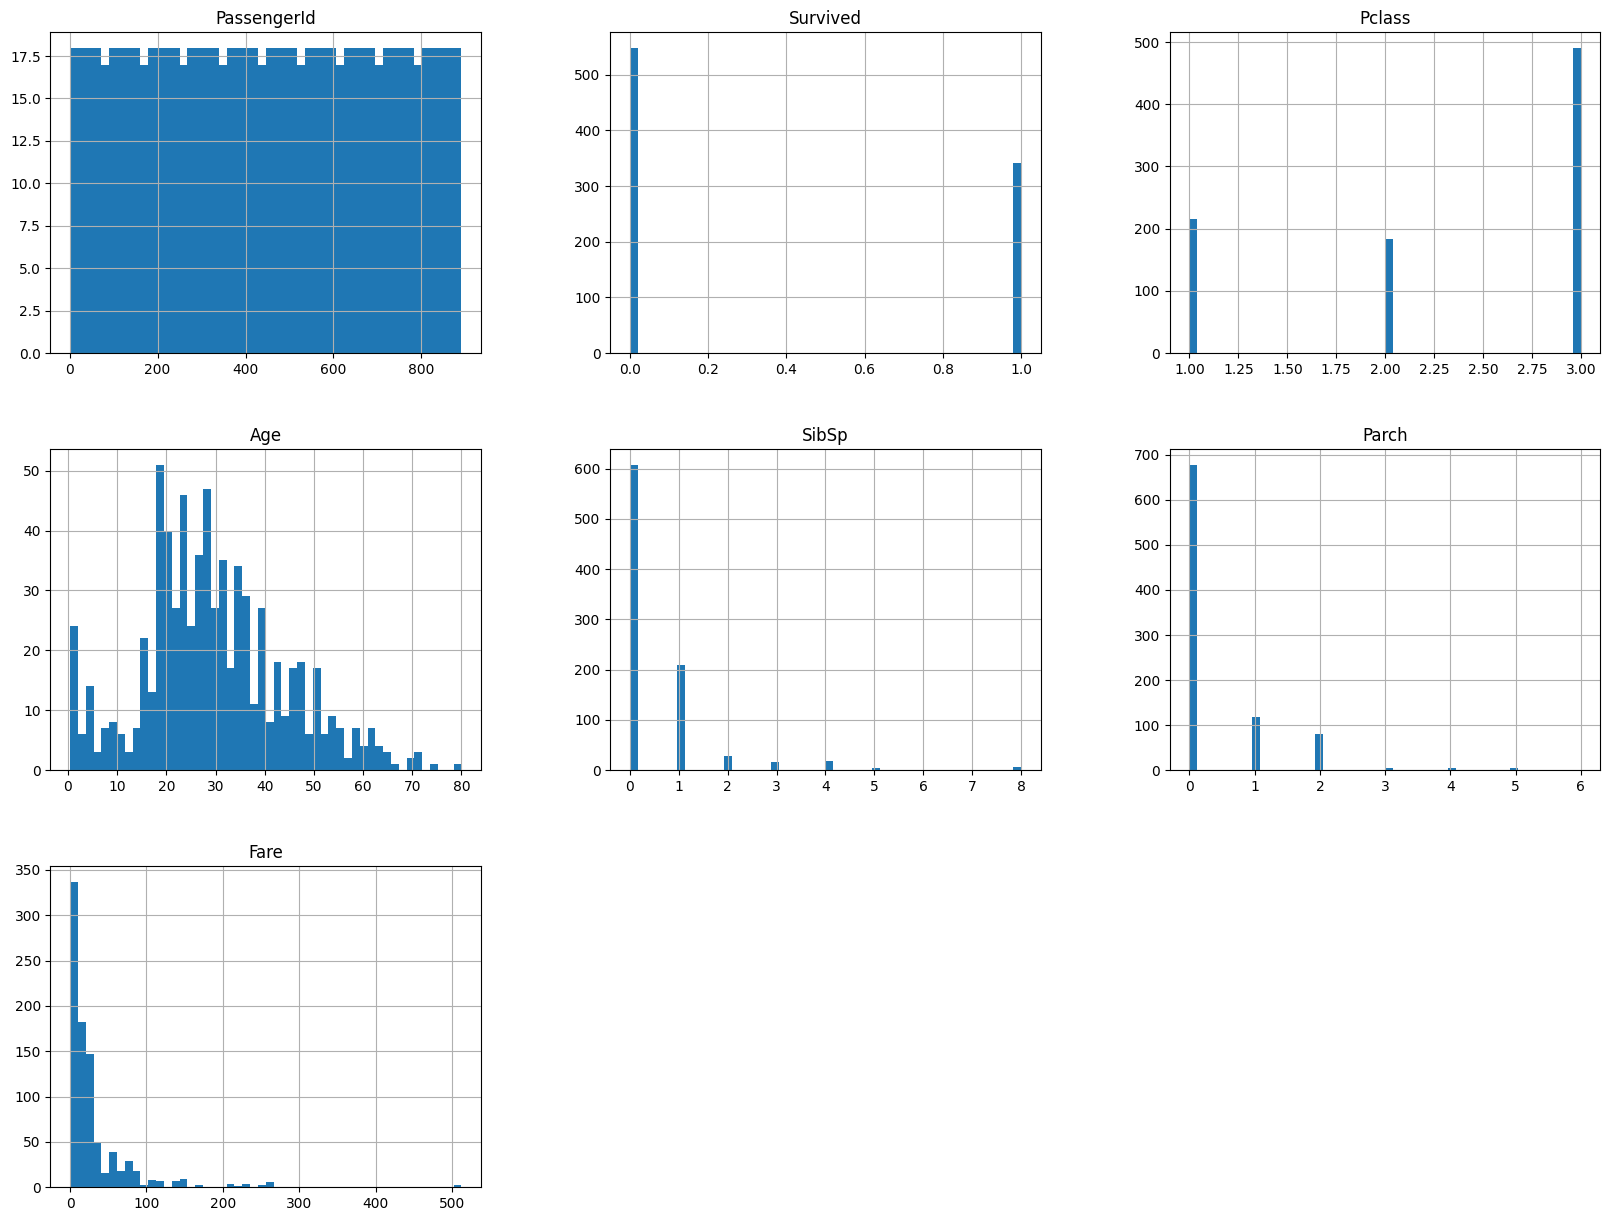

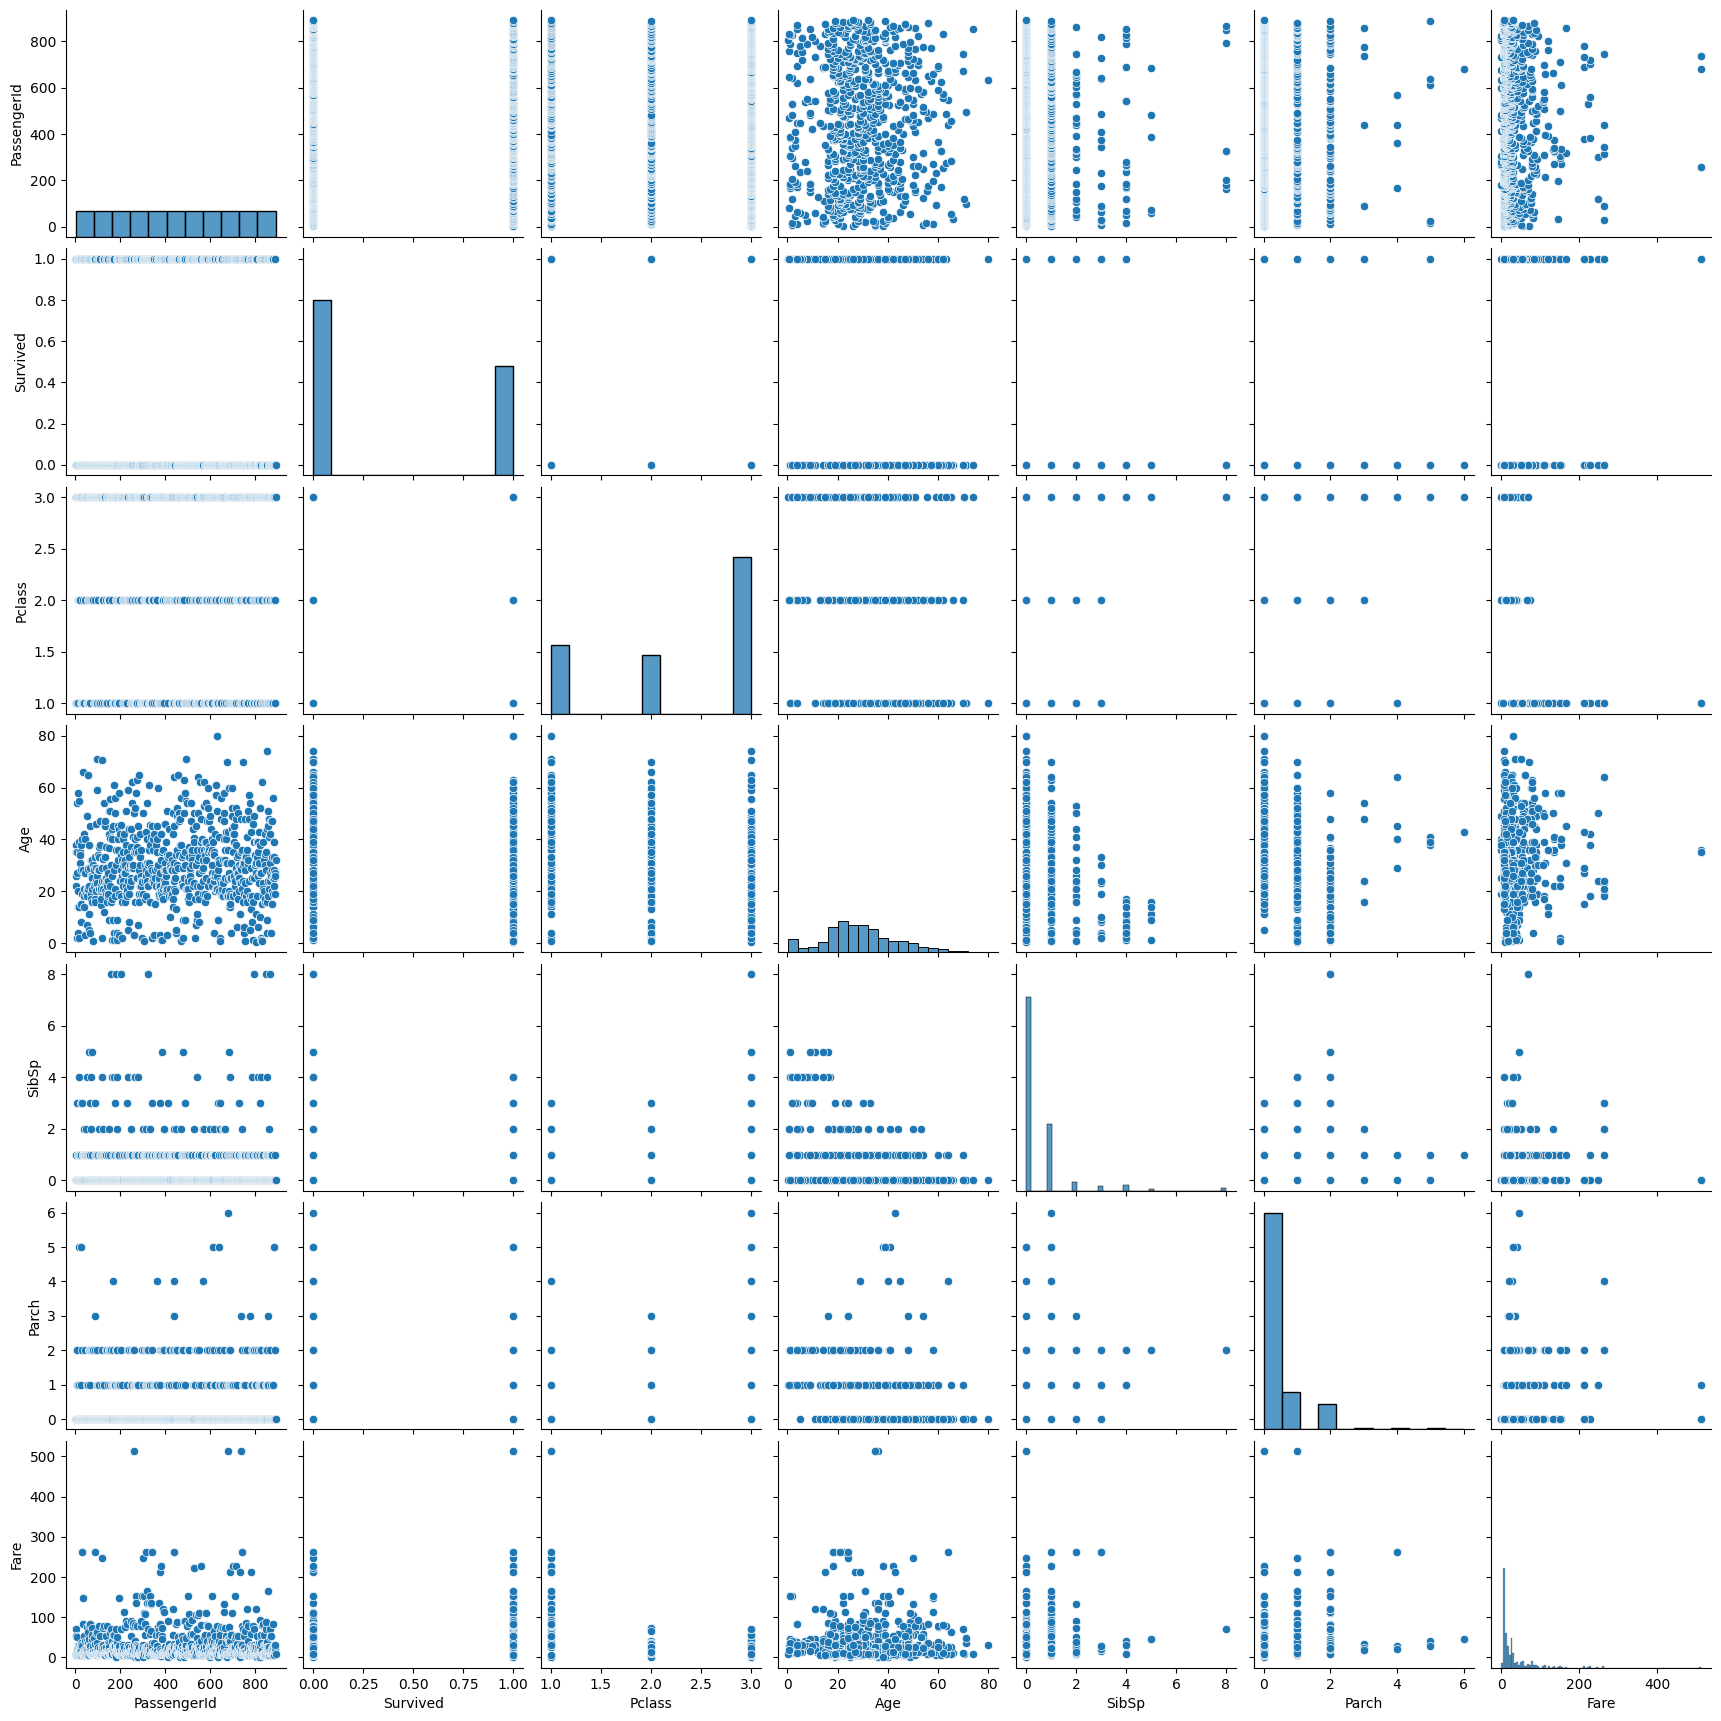

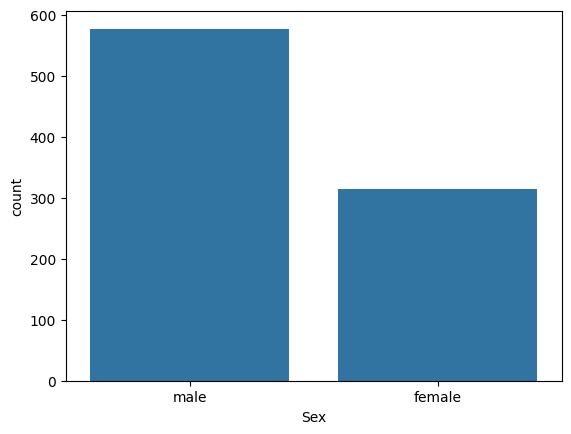

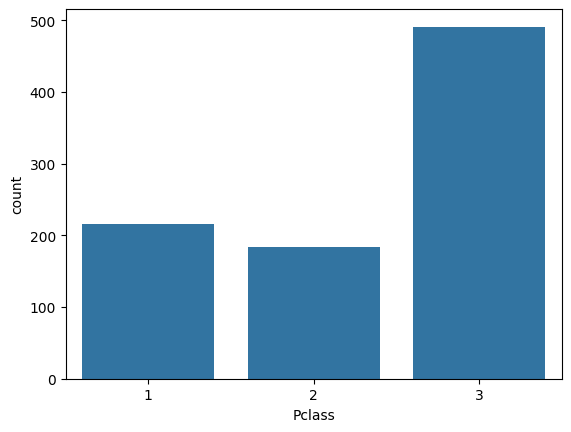

In [168]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
print(df.head())
# Import libraries for visualization

# Basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

# Distribution of numerical features
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Pairplot for numerical features
sns.pairplot(df)
plt.show()

# Countplot for categorical features
sns.countplot(data=df, x='Sex')
plt.show()
sns.countplot(data=df, x='Pclass')
plt.show()


In [169]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

# Drop the column if it is not useful
df = df.drop(columns=['SibSp','Parch','Cabin','Name', 'Ticket', 'PassengerId'])
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [177]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [178]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import joblib

# Pilih fitur dan target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
target = 'Survived'

X = data[features]
y = data[target]

# Menangani nilai kosong pada kolom 'Age', 'Fare', dan 'Embarked'
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)

C:\Users\HP 14S\AppData\Local\Temp\ipykernel_23316\2357421906.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)
C:\Users\HP 14S\AppData\Local\Temp\ipykernel_23316\2357421906.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(), inplace=True)
C:\Users\HP 14S\A

In [179]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [180]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Pilih fitur dan target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
target = 'Survived'

X = df[features]
y = df[target]

# Preprocessing
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Menangani nilai kosong dengan median
    ('scaler', StandardScaler())
])

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [181]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [187]:
from sklearn.impute import KNNImputer
# Pisahkan kolom numerik dan kategorikal
numerical_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(include=['object'])

# Inisialisasi KNNImputer untuk kolom numerik
knn_imputer = KNNImputer(n_neighbors=3)

# Fit imputer pada dataset dan transformasikan untuk mengisi nilai yang hilang
imp_numerical_data = knn_imputer.fit_transform(numerical_cols)

# Konversi hasil kembali ke DataFrame
df_numerical_imp = pd.DataFrame(imp_numerical_data, columns=numerical_cols.columns)

# Inisialisasi SimpleImputer untuk kolom kategorikal
simple_imputer = SimpleImputer(strategy='most_frequent')

# Fit imputer pada kolom kategorikal dan transformasikan untuk mengisi nilai yang hilang
imp_categorical_data = simple_imputer.fit_transform(categorical_cols)

# Konversi hasil kembali ke DataFrame
df_categorical_imp = pd.DataFrame(imp_categorical_data, columns=categorical_cols.columns)

# Gabungkan kolom numerik dan kategorikal yang telah diimputasi
df_final = pd.concat([df_numerical_imp, df_categorical_imp], axis=1)

print(df_final)

     Survived  Pclass   Age     Fare     Sex Embarked
0         0.0     3.0  22.0   7.2500    male        S
1         1.0     1.0  38.0  71.2833  female        C
2         1.0     3.0  26.0   7.9250  female        S
3         1.0     1.0  35.0  53.1000  female        S
4         0.0     3.0  35.0   8.0500    male        S
..        ...     ...   ...      ...     ...      ...
886       0.0     2.0  27.0  13.0000    male        S
887       1.0     1.0  19.0  30.0000  female        S
888       0.0     3.0  35.0  23.4500  female        S
889       1.0     1.0  26.0  30.0000    male        C
890       0.0     3.0  32.0   7.7500    male        Q

[891 rows x 6 columns]


In [188]:
df_final.isna().sum()

Survived    0
Pclass      0
Age         0
Fare        0
Sex         0
Embarked    0
dtype: int64

In [189]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Sex       891 non-null    object 
 5   Embarked  891 non-null    object 
dtypes: float64(4), object(2)
memory usage: 41.9+ KB


In [191]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_final['Sex'] = label_encoder.fit_transform(df['Sex'])
df_final['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [192]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Sex       891 non-null    int64  
 5   Embarked  891 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 41.9 KB


In [195]:
print(df_final)

     Survived  Pclass   Age     Fare  Sex  Embarked
0         0.0     3.0  22.0   7.2500    1         2
1         1.0     1.0  38.0  71.2833    0         0
2         1.0     3.0  26.0   7.9250    0         2
3         1.0     1.0  35.0  53.1000    0         2
4         0.0     3.0  35.0   8.0500    1         2
..        ...     ...   ...      ...  ...       ...
886       0.0     2.0  27.0  13.0000    1         2
887       1.0     1.0  19.0  30.0000    0         2
888       0.0     3.0  35.0  23.4500    0         2
889       1.0     1.0  26.0  30.0000    1         0
890       0.0     3.0  32.0   7.7500    1         1

[891 rows x 6 columns]


In [197]:
# Separate
# 80:20 split
train_df = df_final.iloc[:716, :]
test_df = df_final.iloc[716:, :5]


In [198]:
x = train_df.drop('Survived', axis=1)
y = train_df['Survived'].astype('category').cat.codes

In [200]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score,mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  # Import SVC

# Load or prepare your dataset here
# X_train, X_test, y_train, y_test = ...

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train KNN Classifier
knn_model = KNeighborsClassifier()  # Change to KNN
knn_model .fit(X_train, y_train)
y_pred_knn= knn_model.predict(X_test)

# Train Naive Bayes Classifier
nb_model = GaussianNB()  # Change to Naive Bayes
nb_model .fit(X_train, y_train)
y_pred_nb= nb_model.predict(X_test)

# Train ANN Classifier
ann_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
ann_model.fit(X_train, y_train)
y_pred_ann = ann_model.predict(X_test)

# Train Logistic Regression Classifier
logistic_model = LogisticRegression(random_state=42)  # Change to Logistic Regression
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Train SVC Classifier
svc_model = SVC(kernel='linear', random_state=42)  # Change to SVC
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# Evaluate models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
accuracy_rf = accuracy_score(y_test, y_pred_logistic)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print(f'Akurasi Decision Tree: {accuracy_dt}')
print(f'Akurasi KNN: {accuracy_knn}')
print(f'Akurasi Naive Bayes: {accuracy_nb}')
print(f'Akurasi ANN: {accuracy_ann}')
print(f'Akurasi Logistik {accuracy_rf}')
print(f'Akurasi SVC: {accuracy_svc}')

print("Laporan Klasifikasi Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("Laporan Klasifikasi KNN:\n", classification_report(y_test, y_pred_knn))
print("Laporan Klasifikasi Naive Bayes:\n", classification_report(y_test, y_pred_nb))
print("Laporan Klasifikasi ANN:\n", classification_report(y_test, y_pred_ann))
print("Laporan Klasifikasi Logistik:\n", classification_report(y_test, y_pred_logistic))
print("Laporan Klasifikasi SVC:\n", classification_report(y_test, y_pred_svc))

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Instantiate the model
log_reg_model = LogisticRegression(random_state=42)

# Fit the model
log_reg_model.fit(X_train, y_train)

# Predict using the trained model
y_pred = log_reg_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8263888888888888
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        91
           1       0.78      0.74      0.76        53

    accuracy                           0.83       144
   macro avg       0.82      0.81      0.81       144
weighted avg       0.82      0.83      0.83       144



In [222]:
print(df_final)

     Survived  Pclass   Age     Fare  Sex  Embarked
0         0.0     3.0  22.0   7.2500    1         2
1         1.0     1.0  38.0  71.2833    0         0
2         1.0     3.0  26.0   7.9250    0         2
3         1.0     1.0  35.0  53.1000    0         2
4         0.0     3.0  35.0   8.0500    1         2
..        ...     ...   ...      ...  ...       ...
886       0.0     2.0  27.0  13.0000    1         2
887       1.0     1.0  19.0  30.0000    0         2
888       0.0     3.0  35.0  23.4500    0         2
889       1.0     1.0  26.0  30.0000    1         0
890       0.0     3.0  32.0   7.7500    1         1

[891 rows x 6 columns]


In [224]:
import numpy as np

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Latih model Logistic Regression
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

# Prediksi pada data pengujian
y_pred = log_reg_model.predict(X_test_scaled)

# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Data baru untuk prediksi
input_data = (1,38,71,0,0 )  # Contoh data input, sesuaikan dengan fitur yang digunakan

# Ubah input data ke numpy array dan normalisasi
input_data_as_numpy_array = np.array(input_data).reshape(1, -1)
input_data_scaled = scaler.transform(input_data_as_numpy_array)

# Prediksi menggunakan model
prediction = log_reg_model.predict(input_data_scaled)

# Output prediksi
print("Prediksi:", prediction[0])

if prediction[0] == 0:
    print('Tidak Selamat')
else:
    print('Selamat')

Akurasi: 0.8263888888888888
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        91
           1       0.78      0.74      0.76        53

    accuracy                           0.83       144
   macro avg       0.82      0.81      0.81       144
weighted avg       0.82      0.83      0.83       144

Prediksi: 1
Selamat


c:\Users\HP 14S\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [225]:
import pickle
filename = 'titanic_predict.sav'
pickle.dump(log_reg_model,open(filename,'wb'))

In [226]:
import pickle
import streamlit as st
import numpy as np

# Membaca model
titanic_predict = pickle.load(open('titanic_predict.sav','rb'))

# Judul web
st.title('Titanic Survival Predictor')
# Input data dengan contoh angka valid untuk pengujian

Class = st.text_input('Pclass')
Age = st.text_input('Age')
Fare = st.text_input('Fare')
Sex = st.text_input('Sex')
Embarked = st.text_input('Embarked')

prediction = ''

# Membuat tombol untuk prediksi
if st.button('Prediksi'):
    try:
        # Konversi input menjadi numerik
        inputs = np.array([[float(Class), float(Age), float(Fare), float(Sex), float(Embarked)]])
        # Lakukan prediksi
        prediction = titanic_predict.predict(inputs)
        
        if pokemon_prediksi[0] == 1:
            prediction = 'Survived'
            st.success(prediction)
        else:
            prediction = '<span style="color:red">Not Survived</span>'
            st.markdown(prediction, unsafe_allow_html=True)
    except ValueError:
        st.error("Pastikan semua input diisi dengan angka yang valid.")
    except Exception as e:
        st.error(f"Terjadi kesalahan: {e}")

ModuleNotFoundError: No module named 'streamlit'

In [229]:
from sklearn.preprocessing import StandardScaler

# Misalkan Anda sudah memiliki scaler
scaler = StandardScaler()
scaler.fit(X_train)  # Fit scaler pada data pelatihan

# Simpan model dan scaler
joblib.dump(log_reg_model, 'titanic_predict.sav')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [228]:
max_fare = df['Fare'].max()

print("Nilai tertinggi dalam kolom 'Fare' adalah:", max_fare)

Nilai tertinggi dalam kolom 'Fare' adalah: 512.3292


In [ ]:
cara menguji model svm
bikin sintaks prediksi ( 0 atau 1)
prediksi diubah ke file sav
bikin python
bikin requirment.txt
langsung ke git hub
buka streamlit

In [ ]:
pip install streamlit